In [203]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Introdução<br>
As seguintes análises a serem apresentadas responderão perguntas como:<br>
<ul>
  <li>Tempo de engajamento pelos jogadores na plataforma</li>
  <li>Tempo empregado no jogo por rankings</li>
  <li>Tempo empregado no jogo por idades</li>
</ul>

Importando os dados para uso.

In [204]:
jogadores = pd.read_csv("jogadores.csv")
partidas = pd.read_csv("partidas.csv")
jogadores

,Unnamed: 0,nome,rank,idade,email,hash_senha
0,0,EsquiloTorto,78,30,EsquiloTorto@yahoo.com,970642661180
1,1,Lfz,50,18,Lfz@hotmail.com,300474884555
2,2,MorfeuDoidao,79,23,MorfeuDoidao@gmail.com,833897040891
3,3,Uizel,67,23,Uizel@hotmail.com,426434720147
4,4,Shimo,63,21,Shimo@hotmail.com,881765941010
...,...,...,...,...,...,...
595,595,Diablo473,32,24,Diablo473@gmail.com,297395343799
596,596,Diablete42,37,20,Diablete42@gmail.com,970043429853
597,597,Sasuke563,48,18,Sasuke563@gmail.com,727449479449
598,598,Contra619,54,21,Contra619@gmail.com,785943860326


Tempo de engajamento dos jogadores na plataforma<br>

In [205]:
# Criação de um novo dataframe para a observação desejada dos dados

score1_tempo = partidas.groupby("p1")[["score1", "tempo"]].apply(lambda x: x.sum())
score1_tempo["tempo"] = score1_tempo["tempo"]/60
tempo_total = score1_tempo["tempo"].sum()

print(score1_tempo.head(10))
print("#####")
print("#####")
print(f"""Soma total do tempo gasto na plataforma pela união de todos os players: 
    \n {tempo_total.round()} mins ou {(tempo_total/60).round()} horas por dia""")

    score1      tempo
p1                   
0       10  20.000000
1        7  20.116667
2        4  10.000000
3       10  30.000000
4       19  25.600000
5       26  40.000000
6       11  20.000000
7        7  10.000000
8        5  20.000000
9       19  16.050000
#####
#####
Soma total do tempo gasto na plataforma pela união de todos os players: 
    
 19663.0 mins ou 328.0 horas por dia


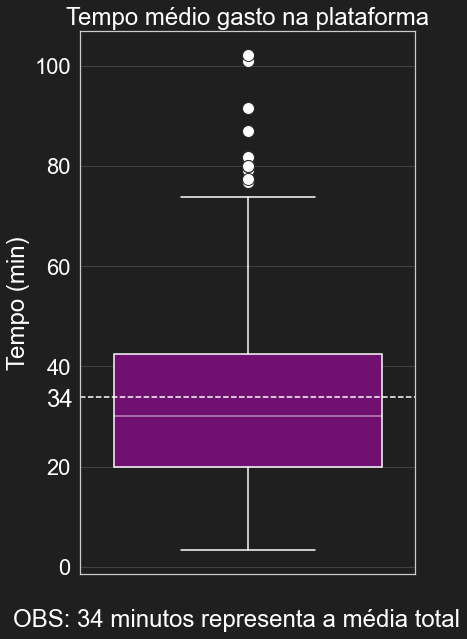

NoneType

In [231]:
# Mudança de características estéticas no boxplot

PROPS = {
    "boxprops":{"edgecolor":"white"},
    "medianprops":{"color":"white"},
    "whiskerprops":{"color":"white"},
    "capprops":{"color":"white"},
    "flierprops": {"markerfacecolor": "white", "markersize": 12, "marker": "o"},
    "meanprops": {"color": "white"},
    "medianprops": {"color": "white", "alpha": 0.5}

}

# Alterações estéticas na plotagem

sns.set_theme(font_scale=2, style="whitegrid",
rc={"figure.figsize":(6, 10),
    "axes.facecolor": "#1f1f1f",
    "figure.facecolor": "#1f1f1f",
    "text.color": "white",
    "axes.labelcolor": "white",
    "xtick.color": "white",
    "ytick.color": "white"})

# Definição do gráfico e sua plotagem

figura1 = sns.boxplot(data=score1_tempo, y="tempo", color = "purple", **PROPS)
figura1.axhline(sum(score1_tempo["tempo"])/len(score1_tempo["tempo"]), color = "white", linestyle = "--")
figura1.set(ylabel="Tempo (min)")
figura1.set_title("Tempo médio gasto na plataforma")
figura1.grid(alpha = 0.2, axis="y")
figura1.annotate("34", (-0.6, 32), annotation_clip=False)
plt.text(-0.7,-12,"OBS: 34 minutos representa a média total")

plt.show()

O gráfico representa uma amostra a média de todos os indivíduos que jogaram nas últimas 24 horas. Com isso, perceba a grande maioria das pessoas permanecem engajadas na plataforma por tempos entre 20 minutos e pouco mais que 40 minutos, sendo 10 minutos o tempo padrão de um jogo para terminar caso a pontuação máxima de 10 pontos não seja alcançada. Em contraste com mídias socias, onde cada usuário fica 2:24 h por dia em média, os jogadores tem gastado aproximadamente 20 % do mesmo tempo jogando, uma grande comparação levando-se em conta que aquelas mídias são administradas por empresas notáveis. Com isso, para uma plataforma nova e independente os tempos tem apresentado resultados positivos no geral.

Análise do tempo empregado em jogos categoricamente por rankings

In [225]:
# Criação de um novo dataframe para uso
score1_tempo = score1_tempo.reset_index()
rank_ST = jogadores.merge(score1_tempo, left_on = "Unnamed: 0", right_on="p1").drop(columns = ["Unnamed: 0"])

In [226]:
rank_ST[["nome", "rank", "p1", "score1", "tempo"]].head(20)

,nome,rank,p1,score1,tempo
0,EsquiloTorto,78,0,10,20.000000
1,Lfz,50,1,7,20.116667
2,MorfeuDoidao,79,2,4,10.000000
3,Uizel,67,3,10,30.000000
4,Shimo,63,4,19,25.600000
5,duduxgamer,19,5,26,40.000000
6,YodaSL,47,6,11,20.000000
7,alanzoka,57,7,7,10.000000
8,Kami,100,8,5,20.000000
9,Faker,62,9,19,16.050000


In [227]:
# Criação de variáveis para dataframe de análise final

categoria_0_20 = rank_ST.sort_values("rank")
categoria_0_20 = categoria_0_20.loc[rank_ST["rank"] <= 20].reset_index(drop=True)
tempo_medio_0_20 = categoria_0_20["tempo"].sum()/(len(categoria_0_20.index))

categoria_21_40 = rank_ST.sort_values("rank")
categoria_21_40 = categoria_21_40.loc[(rank_ST["rank"] <= 40) & (rank_ST["rank"] >= 21)].reset_index(drop=True)
tempo_medio_21_40 = categoria_21_40["tempo"].sum()/(len(categoria_21_40.index))

categoria_41_60 = rank_ST.sort_values("rank")
categoria_41_60 = categoria_41_60.loc[(rank_ST["rank"] <= 60) & (rank_ST["rank"] >= 41)].reset_index(drop=True)
tempo_medio_41_60 = categoria_41_60["tempo"].sum()/(len(categoria_41_60.index))

categoria_61_80 = rank_ST.sort_values("rank")
categoria_61_80 = categoria_61_80.loc[(rank_ST["rank"] <= 80) & (rank_ST["rank"] >= 61)].reset_index(drop=True)
tempo_medio_61_80 = categoria_61_80["tempo"].sum()/(len(categoria_61_80.index))

categoria_81_100 = rank_ST.sort_values("rank")
categoria_81_100 = categoria_81_100.loc[(rank_ST["rank"] <= 100) & (rank_ST["rank"] >= 81)].reset_index(drop=True)
tempo_medio_81_100 = categoria_81_100["tempo"].sum()/(len(categoria_81_100.index))

#Listas para criação do dataframe final

categorias_rank = ["0~20", "21~40", "41~60", "61~80", "81~100"]
tempos_rank = [tempo_medio_0_20, tempo_medio_21_40, tempo_medio_41_60, tempo_medio_61_80, tempo_medio_81_100]

df = pd.DataFrame(list(zip(categorias_rank,tempos_rank)), columns = ["Categorias", "Tempo"])

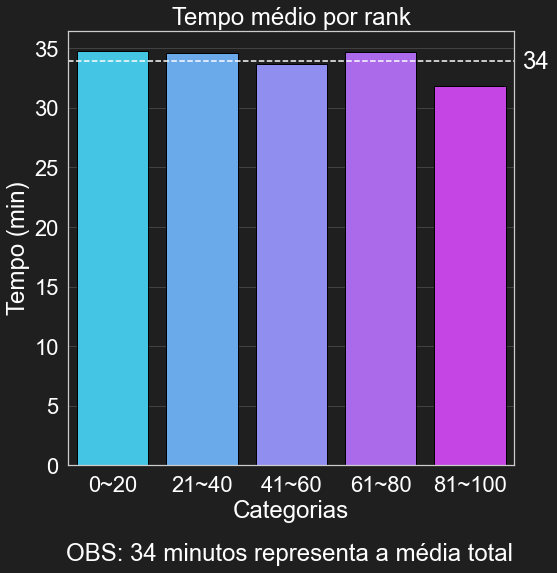

In [228]:
# Alterações estéticas na plotagem

sns.set_theme(font_scale=2, style="whitegrid",
rc={"figure.figsize": (8, 8),
    "axes.facecolor": "#1f1f1f",
    "figure.facecolor": "#1f1f1f",
    "text.color": "white",
    "axes.labelcolor": "white",
    "xtick.color": "white",
    "ytick.color": "white"})

# Definição do gráfico e sua plotagem

figura2 = sns.barplot(data = df, x="Categorias", y="Tempo", palette=sns.color_palette("cool", 5), edgecolor="black")
figura2.axhline(sum(tempos_rank)/len(tempos_rank), color = "white", linestyle = "--")
figura2.set(xlabel = "Categorias", ylabel="Tempo (min)")
figura2.set_title("Tempo médio por rank")
figura2.grid(alpha = 0.2, axis="y")
figura2.annotate("34", (4.6, 33.3), annotation_clip=False)
plt.text(-0.52,-8,"OBS: 34 minutos representa a média total")
plt.show()

Apesar de termos 5 categorias para análise veja que entre as 4 primeiras categorias não há tanta discrepância entre os tempos de jogo, porém pessoas entre os rankings de 81~100 passam menos tempo jogando, isto é devido a diferença de habilidade entre esses e os outros grupos. Com isso, uma provavel observação é que um conhecimento a mais de alguns players lhes permite que seu jogos sejam mais efetivos e rápidos, lhes poupando mais tempo. Em contraste, neste mesmo dia estes podem ter pego pessoas que são bem mais abaixo que seu nível e assim finalizaram a partida mais rapidamente.<br>

In [229]:
# Criação de variáveis para dataframe de análise final

categoria_10_17 = rank_ST.sort_values("idade")
categoria_10_17 = categoria_10_17.loc[rank_ST["idade"] <= 17].reset_index(drop=True)
tempo_medio_10_17 = categoria_10_17["tempo"].sum()/(len(categoria_10_17.index))

categoria_18_26 = rank_ST.sort_values("idade")
categoria_18_26 = categoria_18_26.loc[(rank_ST["idade"] <= 26) & (rank_ST["idade"] >= 18)].reset_index(drop=True)
tempo_medio_18_26 = categoria_18_26["tempo"].sum()/(len(categoria_18_26.index))

categoria_27_35 = rank_ST.sort_values("idade")
categoria_27_35 = categoria_27_35.loc[(rank_ST["idade"] <= 35) & (rank_ST["idade"] >= 27)].reset_index(drop=True)
tempo_medio_27_35 = categoria_27_35["tempo"].sum()/(len(categoria_27_35.index))

#Listas para criação do dataframe final

categorias_idade = ["10~17", "18~26", "27~35"]
tempos_idade = [tempo_medio_10_17, tempo_medio_18_26, tempo_medio_27_35]

df_2 = pd.DataFrame(list(zip(categorias_idade,tempos_idade)), columns = ["Idades", "Tempo"])

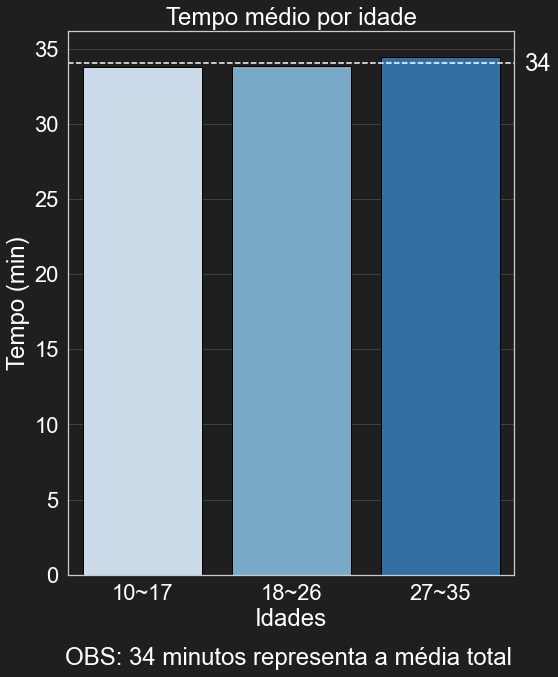

In [230]:
# Alterações estéticas na plotagem

sns.set_theme(font_scale=2, style="whitegrid",
rc={"figure.figsize": (8, 10),
    "axes.facecolor": "#1f1f1f",
    "figure.facecolor": "#1f1f1f",
    "text.color": "white",
    "axes.labelcolor": "white",
    "xtick.color": "white",
    "ytick.color": "white"})

# Definição do gráfico e sua plotagem

figura3 = sns.barplot(data = df_2, x="Idades", y="Tempo", palette=sns.color_palette("Blues", 3), edgecolor="black")
figura3.axhline(sum(tempos_idade)/len(tempos_idade),  color = "white", linestyle = "--")
figura3.set(xlabel = "Idades", ylabel="Tempo (min)")
figura3.set_title("Tempo médio por idade")
figura3.grid(alpha = 0.2, axis="y")
figura3.annotate("34", (2.57, 33.5), annotation_clip=False)
plt.text(-0.52,-6,"OBS: 34 minutos representa a média total")
plt.show()

Esta análise se configura por ser relivamente simples e direta. Veja que apesar de na plataforma ter-se idades que variam entre 10 e 35 anos não há uma divergência muito grande entre o tempo média gasto entre os conjuntos. Dessa forma, concluí-se que pessoas de variadas idades podem e tem se divertido com a plataforma.